In [1]:
import numpy as np
import scipy
import pandas
import treelib
import pyclust

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pandas.read_table('data/data_k5.csv', sep=',')

df.head(3)

,x,y,label
0,9.3716,-0.4233,4
1,10.1449,0.0706,4
2,-9.7006,4.7697,1


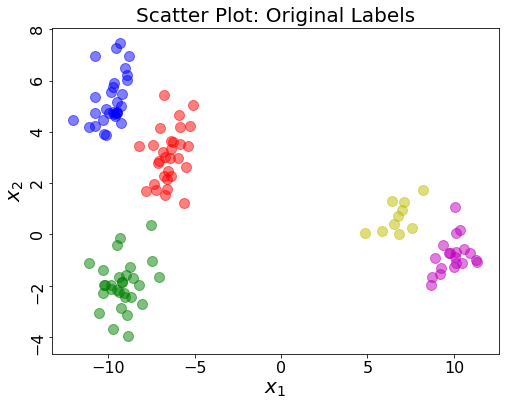

In [3]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()
    
## test plot original data
plot_scatter(df.iloc[:,0:2].values, labels=df.iloc[:,2].values, title="Scatter Plot: Original Labels")

### KMeans Clustering

** K = 5**

[[-9.25017241 -2.04355172]
 [ 9.94503684 -0.92278421]
 [-9.41249706  5.21222647]
 [ 7.01883636  0.71122727]
 [-6.57869259  2.69908148]]


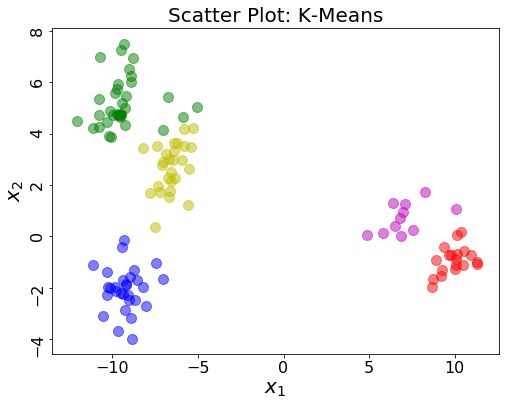

In [4]:
km = pyclust.KMeans(n_clusters=5)

km.fit(df.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(df.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")

## Bisecting K-Means

[7 7 6 6 8 6 5 6 5 6 6 1 6 5 5 7 5 6 6 6 7 6 1 1 5 1 1 1 8 8 1 7 1 7 6 7 5
 7 1 5 1 5 5 8 1 6 5 7 5 7 7 6 5 8 1 1 6 8 7 7 1 1 6 6 7 6 6 5 1 8 1 6 5 7
 1 6 6 1 6 1 1 5 1 1 5 1 6 6 5 6 1 5 6 5 5 1 7 8 5 1 5 7 6 5 5 6 5 1 7 8 8
 5 6 1 8 5 5 6 7 1]


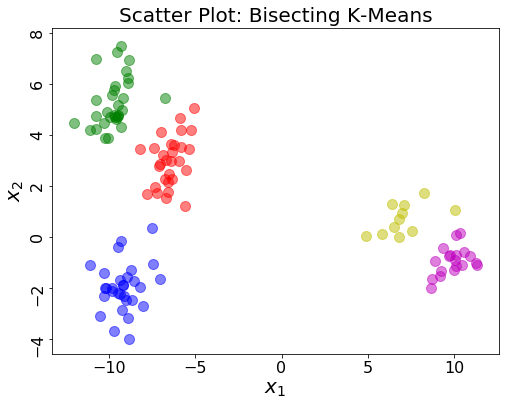

In [5]:
bkm = pyclust.BisectKMeans(n_clusters=5)

bkm.fit(df.iloc[:,0:2].values)

print(bkm.labels_)

plot_scatter(df.iloc[:,0:2].values, labels=bkm.labels_, title="Scatter Plot: Bisecting K-Means")

In [6]:
df.iloc[:,0:2].values

array([[  9.37160000e+00,  -4.23300000e-01],
       [  1.01449000e+01,   7.06000000e-02],
       [ -9.70060000e+00,   4.76970000e+00],
       [ -9.19020000e+00,   5.46920000e+00],
       [  7.08680000e+00,   1.24430000e+00],
       [ -8.89870000e+00,   6.23410000e+00],
       [ -5.95280000e+00,   2.97490000e+00],
       [ -1.11316000e+01,   4.20410000e+00],
       [ -5.06960000e+00,   5.05480000e+00],
       [ -1.03145000e+01,   4.46010000e+00],
       [ -9.64970000e+00,   5.92510000e+00],
       [ -1.11016000e+01,  -1.11020000e+00],
       [ -1.07579000e+01,   4.73150000e+00],
       [ -7.01650000e+00,   4.13400000e+00],
       [ -6.54790000e+00,   2.48760000e+00],
       [  1.12710000e+01,  -9.98700000e-01],
       [ -6.61530000e+00,   1.75440000e+00],
       [ -9.56310000e+00,   4.72700000e+00],
       [ -1.00955000e+01,   3.87090000e+00],
       [ -9.65230000e+00,   4.71770000e+00],
       [  9.78400000e+00,  -7.19500000e-01],
       [ -9.93560000e+00,   4.72510000e+00],
       [ -

In [6]:
bkm.tree_.show(line_type='ascii')

0
|-- 1
|   |-- 3
|   +-- 4
+-- 2
    |-- 5
    |   |-- 7
    |   +-- 8
    +-- 6



### Cutting the tree structure

 * Cut the tree to get a clustering with a new n_cluster
   * `bkm.cut(n_clusters=4)`
 * It returns a tuple:
   * first elemen being the new cluster memberships
   * second element is a dictionary for the centroid of each cluster
   
#### Example

```python
bkm.cut(3)

(array([4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 3,
        3, 2, 3, 4, 3, 4, 4, 3, 4, 3, 4, 2, 4, 2, 4, 3, 2, 3, 2, 2, 4, 3, 2,
        2, 4, 2, 4, 4, 2, 2, 4, 3, 3, 2, 4, 4, 4, 3, 3, 2, 2, 4, 2, 2, 2, 3,
        4, 3, 2, 2, 4, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2,
        2, 2, 2, 3, 4, 4, 2, 3, 2, 4, 2, 2, 2, 2, 2, 3, 4, 4, 4, 2, 2, 3, 4,
        2, 2, 2, 4, 3]),
 {2: [-8.1686500000000013, 4.1619483333333331],
  3: [-9.2501724137931021, -2.0435517241379313],
  4: [8.3429774193548365, -0.30114193548387092]})
```

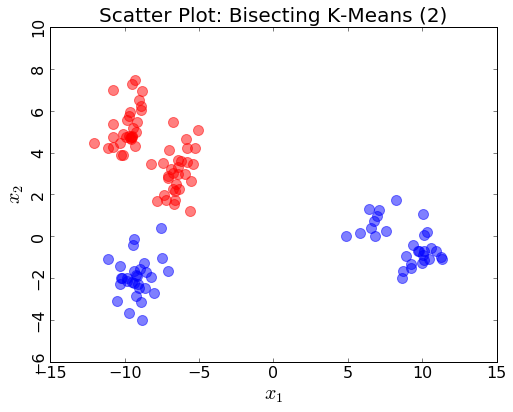

In [7]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(2)[0], title="Scatter Plot: Bisecting K-Means (2)")

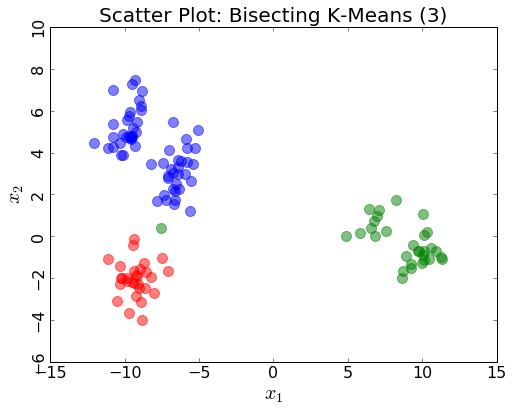

In [8]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(3)[0], title="Scatter Plot: Bisecting K-Means (3)")

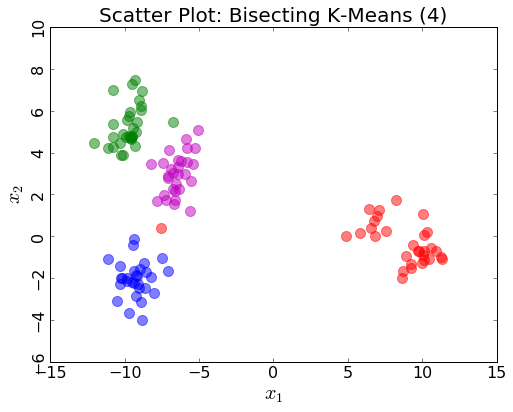

In [9]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(4)[0], title="Scatter Plot: Bisecting K-Means (4)")